In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/omar.elkhawass/Desktop/Insurance_Claim_Data.csv')

pd.set_option('display.max_columns', None) 
df.head(20)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [2]:
print(df[['max_torque','max_power']].dtypes)
df[['max_torque','max_power']].head()

max_torque    object
max_power     object
dtype: object


,max_torque,max_power
0,60Nm@3500rpm,40.36bhp@6000rpm
1,60Nm@3500rpm,40.36bhp@6000rpm
2,60Nm@3500rpm,40.36bhp@6000rpm
3,113Nm@4400rpm,88.50bhp@6000rpm
4,91Nm@4250rpm,67.06bhp@5500rpm


In [3]:
# Cleaning max_torque and max_power columns & converting to float

df['max_torque'] = df['max_torque'].str.extract(r'([-+]?[0-9]*\.?[0-9])').astype(float)
df['max_power'] = df['max_power'].str.extract(r'([-+]?[0-9]*\.?[0-9]+)').astype(float)

print(df['max_torque'].dtypes)
print(df['max_power'].dtypes)
df[['max_torque','max_power']].head(8)

float64
float64


,max_torque,max_power
0,60.0,40.36
1,60.0,40.36
2,60.0,40.36
3,113.0,88.50
4,91.0,67.06
5,250.0,113.45
6,200.0,88.77
7,113.0,88.50


In [4]:
# Now, let's check for any missing values in the dataset

df.isna().sum().sum()

0

<AxesSubplot:>

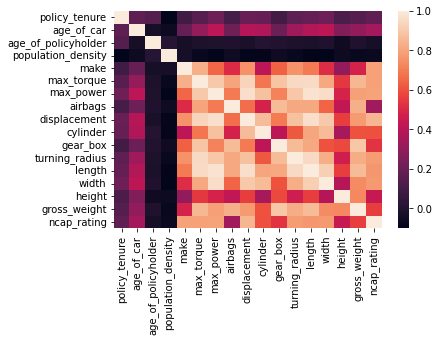

In [5]:
# Correlation Analysis on numeric X columns excluding target
import seaborn as sns

correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation)

In [6]:
# Analyzing cardinality in categorical X columns

df.select_dtypes("object").nunique() 

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                       2
is_driver_seat_height_adjustable        2
is_day_night_rear_view_mirror     

In [7]:
# policy_id and area_cluster are high in cardinality

# we will set policy_id as index as it is not relevant to the model
df = df.set_index('policy_id')

# we will drop the area_cluster column
df = df.drop('area_cluster', axis=1)


Text(0, 0.5, 'Target Value')

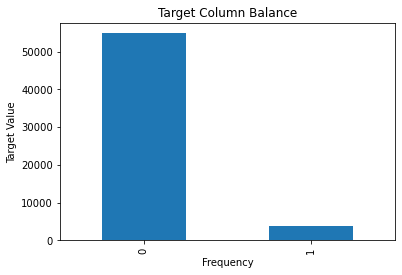

In [8]:
# Analyzing Target Column balance
import matplotlib.pyplot as plt

df['is_claim'].value_counts().plot(kind = 'bar')
plt.title('Target Column Balance')
plt.xlabel('Frequency')
plt.ylabel('Target Value')

In [9]:
# There is a huge imbalance in the target column, needs to be adressed before prediction models can be fitted 
# After splitting train and test portions, we will use an oversampler to fix the imbalance

In [10]:
# Splitting data for Train/Test 
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:len(df.columns)-1]   
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [11]:
X

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
policy_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
ID00002,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
ID00003,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
ID00004,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113.0,88.50,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
ID00005,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91.0,67.06,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID58588,0.355089,0.13,0.644231,8794,2,A,M3,Petrol,91.0,67.06,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
ID58589,1.199642,0.02,0.519231,7788,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
ID58590,1.162273,0.05,0.451923,34738,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [12]:
Y

policy_id
ID00001    0
ID00002    0
ID00003    0
ID00004    0
ID00005    0
          ..
ID58588    0
ID58589    0
ID58590    0
ID58591    0
ID58592    0
Name: is_claim, Length: 58592, dtype: int64

In [13]:
X_train.shape, Y_train.shape

((41014, 41), (41014,))

In [14]:
# Adjusting the imbalance in target column
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy = 'minority')
X_train_OS, Y_train_OS = over_sampler.fit_resample(X_train, Y_train)


In [15]:
# The dataset is now oversampled, adding more samples for the minority class in Y col.

X_train_OS.shape, Y_train_OS.shape

((76780, 41), (76780,))

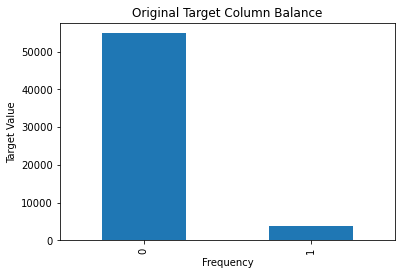

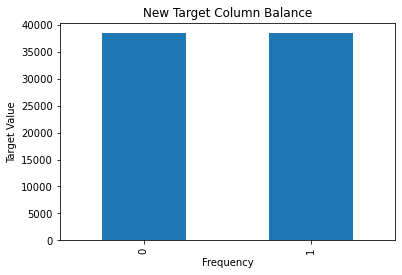

In [16]:
# Comparing original target column balance VS new balance

df['is_claim'].value_counts().plot(kind = 'bar')
plt.title('Original Target Column Balance')
plt.xlabel('Frequency')
plt.ylabel('Target Value')
plt.show()

Y_train_OS.value_counts().plot(kind = 'bar')
plt.title('New Target Column Balance')
plt.xlabel('Frequency')
plt.ylabel('Target Value')
plt.show()

In [17]:
# Now that the target column is balanced, we will create a pipeline to preprocess the X columns further
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_X = X.columns[X.dtypes != 'object']
categorical_X = X.columns[X.dtypes == 'object']

step_1A = Pipeline(
    [
        ('1A', StandardScaler())
    ])

step_1B = Pipeline(
    [
        ('1B', OneHotEncoder())
    ])

step_1C = ColumnTransformer(
    [
        ('1C_i', step_1A, numerical_X),
        ('1C_ii', step_1B, categorical_X)
    ])


In [18]:
# Pipeline: Train and fit using AdaBoost
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier 

step2_AB = Pipeline(
    [
        ('1C', step_1C),
        ('PCA', PCA(n_components = 25)),
        ('AB', AdaBoostClassifier())
    ])

step2_AB.fit(X_train_OS, Y_train_OS)

Pipeline(steps=[('1C',
                 ColumnTransformer(transformers=[('1C_i',
                                                  Pipeline(steps=[('1A',
                                                                   StandardScaler())]),
                                                  Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'max_torque', 'max_power', 'airbags',
       'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating'],
      dtype='object')...
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])),
                ('PCA', PCA(n_components=25)), ('AB', AdaBoostClassifier())])

In [19]:
#Pipeline: Train and fit using Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

step2_GB = Pipeline(
    [
        ('1C', step_1C),
        ('PCA', PCA(n_components = 25)),
        ('GB', GradientBoostingClassifier())
    ])

step2_GB.fit(X_train_OS, Y_train_OS)

Pipeline(steps=[('1C',
                 ColumnTransformer(transformers=[('1C_i',
                                                  Pipeline(steps=[('1A',
                                                                   StandardScaler())]),
                                                  Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'max_torque', 'max_power', 'airbags',
       'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating'],
      dtype='object')...
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])),
                ('PCA', PCA(n_components=25)),
                ('GB', GradientBoostingClassifier())])

In [20]:
#Pipeline: Train and fit using Extreme Gradient Boosting 
import xgboost as xgb

step2_XGB = Pipeline(
    [
        ('1C', step_1C),
        ('PCA', PCA(n_components = 25)),
        ('XGB', xgb.XGBClassifier())
    ])

step2_XGB.fit(X_train_OS, Y_train_OS)

Pipeline(steps=[('1C',
                 ColumnTransformer(transformers=[('1C_i',
                                                  Pipeline(steps=[('1A',
                                                                   StandardScaler())]),
                                                  Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'max_torque', 'max_power', 'airbags',
       'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating'],
      dtype='object')...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [21]:
# Analyzing Accuracy
from sklearn.metrics import accuracy_score

print('AdaBoost Accuracy = ', round(step2_AB.score(X_test, Y_test) *100), '%')
print('Gradient Boosting Accuracy = ', round(step2_GB.score(X_test, Y_test) *100), '%')
print('Extreme Gradient Boosting Accuracy = ', round(step2_XGB.score(X_test, Y_test) *100), '%')

AdaBoost Accuracy =  56 %
Gradient Boosting Accuracy =  57 %
Extreme Gradient Boosting Accuracy =  90 %


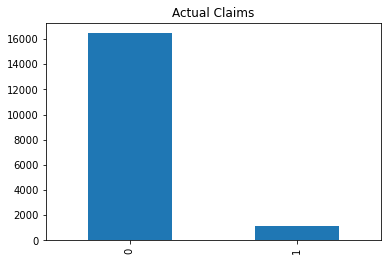

Actual number of claims =  1124


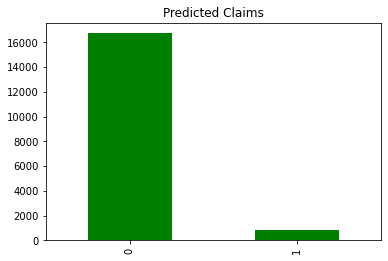

Predicted number of claims =  854 



In [22]:
# We will select the XGB Classifier as it predicts claims with the highest accuracy 

#Visualizing Accuracy of model predictions 

pred = step2_XGB.predict(X_test)
comparisons = pd.DataFrame(Y_test)
comparisons['pred_is_claim'] = pred

comparisons['is_claim'].value_counts().plot(kind = 'bar')
plt.title('Actual Claims')
plt.show()
print('Actual number of claims = ', comparisons['is_claim'].sum())

comparisons['pred_is_claim'].value_counts().plot(kind = 'bar', color = 'g')
plt.title('Predicted Claims')
plt.show()
print('Predicted number of claims = ', comparisons['pred_is_claim'].sum(), '\n')